# What is the Relationship Between a Song's Spotify Streams and YouTube Views?
## Hunter Rings


YouTube Initial EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)
print(ydf.shape)
print(ydf.columns)
print(ydf.dtypes)
print(ydf.describe(include='all'))
print(ydf.head)

Spotify Initial EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')
print(sdf.shape)
print(sdf.columns)
print(sdf.dtypes)
print(sdf.describe(include='all'))
print(sdf.head)

Dropping Columns from Youtube Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoId', 'videoUrl', 'channelId',
      'channelUrl','thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
print(ydf_dropped.shape)
print(ydf_dropped.head())

Dropping Columns from Spotify Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')

sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
print(sdf_dropped.shape)
print(sdf_dropped.head())

Checking Data Types and Null Values in YouTube Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoId', 'videoUrl', 'channelId',
      'channelUrl','thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
print(ydf_dropped.shape)
print(ydf_dropped.isnull().sum())
print(ydf_dropped.dtypes)

Checking Data Types and Null Values in Spotify Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')

sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
print(sdf_dropped.shape)
print(sdf_dropped.isnull().sum())
print(sdf_dropped.dtypes)

Converting Data Types in YouTube Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
print(ydf_dropped.dtypes)

Converting Data Types and Addressing Null Values in Spotify Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')

sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')
print(sdf_clean.dtypes)
print(sdf_clean.isnull().sum())

Renaming Columns in YouTube Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText',, 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()

Merging Rows in YouTube Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()
print(ydf_merged.sort_values(by='YouTube Views', ascending=False).head(25))

Calculating the Most Viewed Music Channels on Youtube in 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()
ydf_channels_unmerged = ydf_merged.drop(columns=['Title', 'Release Date', 'Video ID'])
ydf_channels_merged = ydf_channels_unmerged.groupby('Channel Name').agg({
    'YouTube Views': 'sum'}).reset_index()
print(ydf_channels_merged.sort_values(by='YouTube Views', ascending=False).head(25))

Calculating the Most Streamed Artists on Spotify in 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')

sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')
sdf_artists_unmerged = sdf_clean.drop(columns=['Track', 'Album Name', 'Release Date', 'YouTube Views', 'YouTube Likes'])
sdf_artists_merged = sdf_artists_unmerged.groupby('Artist').agg({
    'Spotify Streams': 'sum'}).reset_index()
print(sdf_artists_merged.sort_values(by='Spotify Streams', ascending=False).head(25))

Finding Artist Data in YouTube Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')
sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')

ydf_merged['Artist'] = ''
artist_list = sdf_clean['Artist'].unique()
def find_artist(title):
    for artist in artist_list:
        if isinstance(title, str) and isinstance(artist, str) and title.startswith(artist):
            return artist
        else:
            return None
    return ''
ydf_merged['Artist'] = ydf_merged['Title'].apply(find_artist)
print(ydf_merged[['Artist', 'Title']].head(50))
print(ydf_merged['Artist'].isnull().sum())


Calculating the Most Viewed Artists on YouTube of 2024 and Joining with the Most Streamed on Spotify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')
sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')

sdf_clean = sdf_clean.drop(columns=['Track', 'Album Name', 'Release Date', 'YouTube Views', 'YouTube Likes'])
sdf_merged_artists = sdf_clean.groupby('Artist').agg({
    'Spotify Streams': 'sum'}).reset_index()

def find_artist(title):
    for artist in sdf_merged_artists['Artist'].unique():
        if isinstance(title, str) and isinstance(artist, str) and title.startswith(artist):
            return artist
    return None

ydf_merged['Artist'] = ''
ydf_merged['Artist'] = ydf_merged['Title'].apply(find_artist) 
ydf_merged = ydf_merged.dropna(subset=['Artist'])
ydf_merged = ydf_merged.drop(columns=['Title', 'Release Date', 'Video ID', 'Channel Name'])
ydf_merged_artists = ydf_merged.groupby('Artist').agg({
    'YouTube Views': 'sum'}).reset_index()

joined_df = pd.merge(ydf_merged_artists, sdf_clean, on='Artist', how='inner')
joined_df = joined_df.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',})
joined_df.sort_values(by='YouTube Views', ascending=False, inplace=True)

print(joined_df.shape)
print(joined_df.head(25))

Calculating the Difference between Spotify Streams and YouTube Views

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')
sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')

sdf_clean = sdf_clean.drop(columns=['Track', 'Album Name', 'Release Date', 'YouTube Views', 'YouTube Likes'])
sdf_merged_artists = sdf_clean.groupby('Artist').agg({
    'Spotify Streams': 'sum'}).reset_index()

def find_artist(title):
    for artist in sdf_merged_artists['Artist'].unique():
        if isinstance(title, str) and isinstance(artist, str) and title.startswith(artist):
            return artist
    return None

ydf_merged['Artist'] = ''
ydf_merged['Artist'] = ydf_merged['Title'].apply(find_artist) 
ydf_merged = ydf_merged.dropna(subset=['Artist'])
ydf_merged = ydf_merged.drop(columns=['Title', 'Release Date', 'Video ID', 'Channel Name'])
ydf_merged_artists = ydf_merged.groupby('Artist').agg({
    'YouTube Views': 'sum'}).reset_index()

joined_df = pd.merge(ydf_merged_artists, sdf_clean, on='Artist', how='inner')
joined_df = joined_df.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',})

joined_df['Stream/View Ratio'] = joined_df['YouTube Views'] / joined_df['Spotify Streams'] * 100
joined_df.sort_values(by='Stream/View Ratio', ascending=False, inplace=True)
print(joined_df.head(80))

              Spotify Streams  YouTube Views  Stream/View Ratio
Artist                                                         
Donald                  67852        5775618        8512.082179
BABYMONSTER         267558551      415924416         155.451737
BossMan Dlow         24834118       18169083          73.161781
Stray Kids         1307089454      806924790          61.734473
ATEEZ               164636730       88889208          53.991116
...                       ...            ...                ...
A$AP Rocky         2834833533       57677440           2.034597
mgk                1366349418       27228384           1.992783
Farruko            4281618531       83192142           1.943007
Katy Perry         7919915969      151097283           1.907814
Grupo Firme        1584828097       28562919           1.802272

[80 rows x 3 columns]


Modeling Our Data

In [220]:
import matplotlib

colors = [c for c in matplotlib.colors.cnames if c != 'mediumseagreen']
print(colors)

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

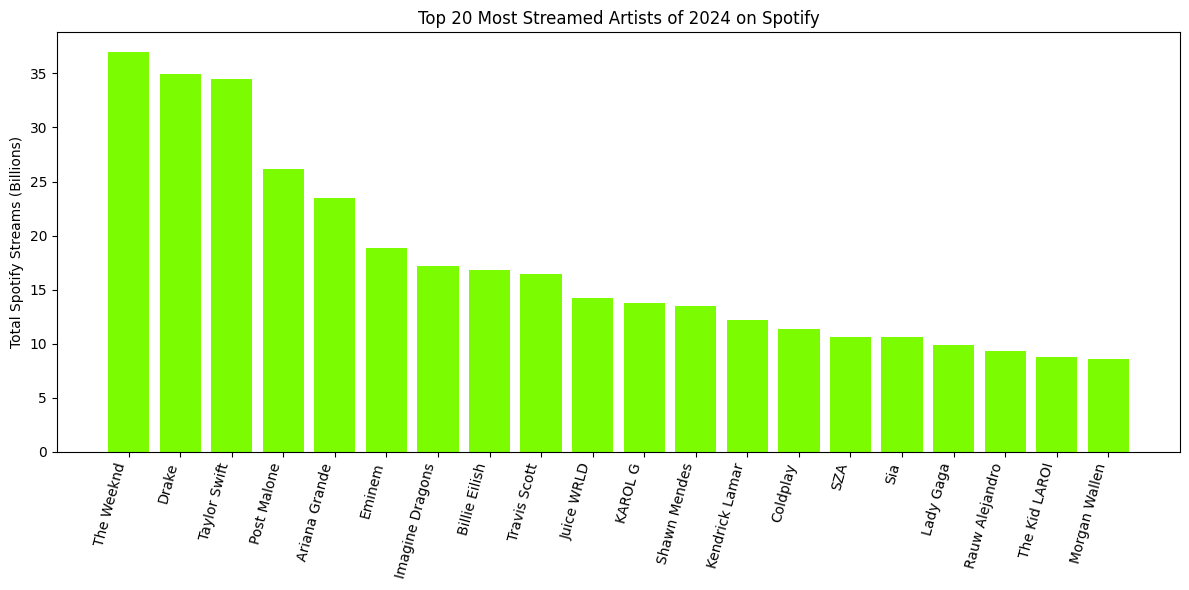

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')
sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')

sdf_clean = sdf_clean.drop(columns=['Track', 'Album Name', 'Release Date', 'YouTube Views', 'YouTube Likes'])
sdf_merged_artists = sdf_clean.groupby('Artist').agg({
    'Spotify Streams': 'sum'}).reset_index()

def find_artist(title):
    for artist in sdf_merged_artists['Artist'].unique():
        if isinstance(title, str) and isinstance(artist, str) and title.startswith(artist):
            return artist
    return None

ydf_merged['Artist'] = ''
ydf_merged['Artist'] = ydf_merged['Title'].apply(find_artist) 
ydf_merged = ydf_merged.dropna(subset=['Artist'])
ydf_merged = ydf_merged.drop(columns=['Title', 'Release Date', 'Video ID', 'Channel Name'])
ydf_merged_artists = ydf_merged.groupby('Artist').agg({
    'YouTube Views': 'sum'}).reset_index()

joined_df = pd.merge(ydf_merged_artists, sdf_clean, on='Artist', how='inner')
joined_df = joined_df.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',})

spotify_top_artists = joined_df.sort_values(by='Spotify Streams', ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.bar(spotify_top_artists.index, (spotify_top_artists['Spotify Streams'] / 1000000000), color='lawngreen')
plt.xticks(rotation=75, ha='right')
plt.ylabel('Total Spotify Streams (Billions)')
plt.title('Top 20 Most Streamed Artists of 2024 on Spotify')
plt.tight_layout()
plt.show()

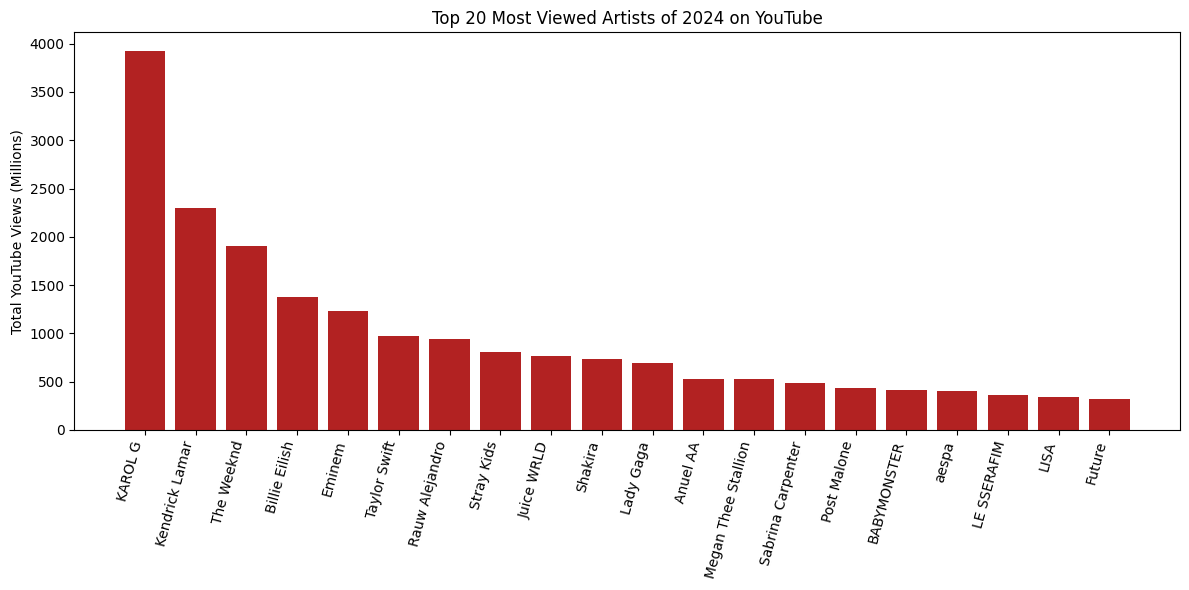

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')
sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')

sdf_clean = sdf_clean.drop(columns=['Track', 'Album Name', 'Release Date', 'YouTube Views', 'YouTube Likes'])
sdf_merged_artists = sdf_clean.groupby('Artist').agg({
    'Spotify Streams': 'sum'}).reset_index()

def find_artist(title):
    for artist in sdf_merged_artists['Artist'].unique():
        if isinstance(title, str) and isinstance(artist, str) and title.startswith(artist):
            return artist
    return None

ydf_merged['Artist'] = ''
ydf_merged['Artist'] = ydf_merged['Title'].apply(find_artist) 
ydf_merged = ydf_merged.dropna(subset=['Artist'])
ydf_merged = ydf_merged.drop(columns=['Title', 'Release Date', 'Video ID', 'Channel Name'])
ydf_merged_artists = ydf_merged.groupby('Artist').agg({
    'YouTube Views': 'sum'}).reset_index()

joined_df = pd.merge(ydf_merged_artists, sdf_clean, on='Artist', how='inner')
joined_df = joined_df.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',})

youtube_top_artists = joined_df.sort_values(by='YouTube Views', ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.bar(youtube_top_artists.index, (youtube_top_artists['YouTube Views'] / 1000000), color='firebrick')
plt.xticks(rotation=75, ha='right')
plt.ylabel('Total YouTube Views (Millions)')
plt.title('Top 20 Most Viewed Artists of 2024 on YouTube')
plt.tight_layout()
plt.show()

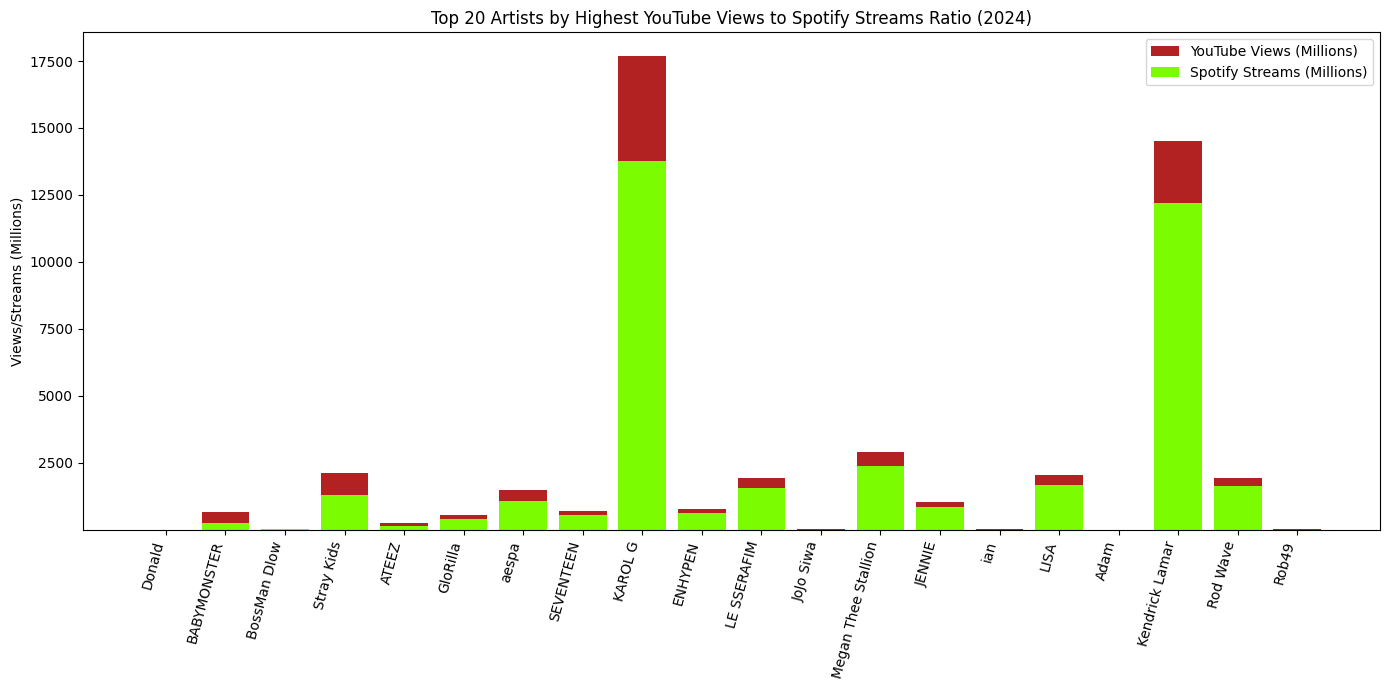

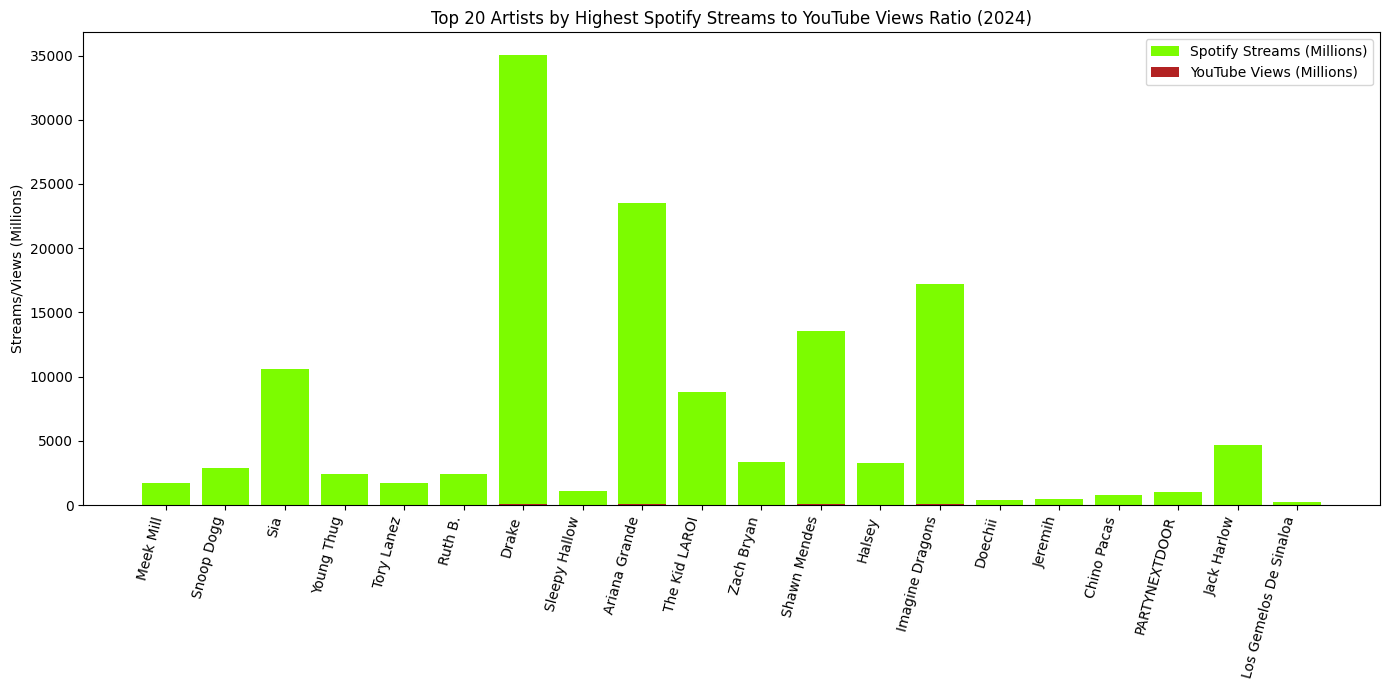

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')
sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')

sdf_clean = sdf_clean.drop(columns=['Track', 'Album Name', 'Release Date', 'YouTube Views', 'YouTube Likes'])
sdf_merged_artists = sdf_clean.groupby('Artist').agg({
    'Spotify Streams': 'sum'}).reset_index()

def find_artist(title):
    for artist in sdf_merged_artists['Artist'].unique():
        if isinstance(title, str) and isinstance(artist, str) and title.startswith(artist):
            return artist
    return None

ydf_merged['Artist'] = ''
ydf_merged['Artist'] = ydf_merged['Title'].apply(find_artist) 
ydf_merged = ydf_merged.dropna(subset=['Artist'])
ydf_merged = ydf_merged.drop(columns=['Title', 'Release Date', 'Video ID', 'Channel Name'])
ydf_merged_artists = ydf_merged.groupby('Artist').agg({
    'YouTube Views': 'sum'}).reset_index()

joined_df = pd.merge(ydf_merged_artists, sdf_clean, on='Artist', how='inner')
joined_df = joined_df.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',})

joined_df['Stream/View Ratio'] = joined_df['YouTube Views'] / joined_df['Spotify Streams']

top_youtube_ratio = joined_df.sort_values(by='Stream/View Ratio', ascending=False).head(20)

plt.figure(figsize=(14,7))
plt.bar(top_youtube_ratio.index, top_youtube_ratio['YouTube Views'] / 1e6, label='YouTube Views (Millions)', color='firebrick', bottom=top_youtube_ratio['Spotify Streams'] / 1e6)
plt.bar(top_youtube_ratio.index, top_youtube_ratio['Spotify Streams'] / 1e6, label='Spotify Streams (Millions)', color='lawngreen')

plt.xticks(rotation=75, ha='right')
plt.ylabel('Views/Streams (Millions)')
plt.title('Top 20 Artists by Highest YouTube Views to Spotify Streams Ratio (2024)')
plt.legend()
plt.tight_layout()
plt.show()


joined_df['View/Stream Ratio'] = joined_df['Spotify Streams'] / joined_df['YouTube Views']

top_spotify_ratio = joined_df.sort_values(by='View/Stream Ratio', ascending=False).head(20)

plt.figure(figsize=(14,7))
plt.bar(top_spotify_ratio.index, top_spotify_ratio['Spotify Streams'] / 1e6, label='Spotify Streams (Millions)', color='lawngreen', bottom=top_spotify_ratio['YouTube Views'] / 1e6)
plt.bar(top_spotify_ratio.index, top_spotify_ratio['YouTube Views'] / 1e6, label='YouTube Views (Millions)', color='firebrick')

plt.xticks(rotation=75, ha='right')
plt.ylabel('Streams/Views (Millions)')
plt.title('Top 20 Artists by Highest Spotify Streams to YouTube Views Ratio (2024)')
plt.legend()
plt.tight_layout()
plt.show()



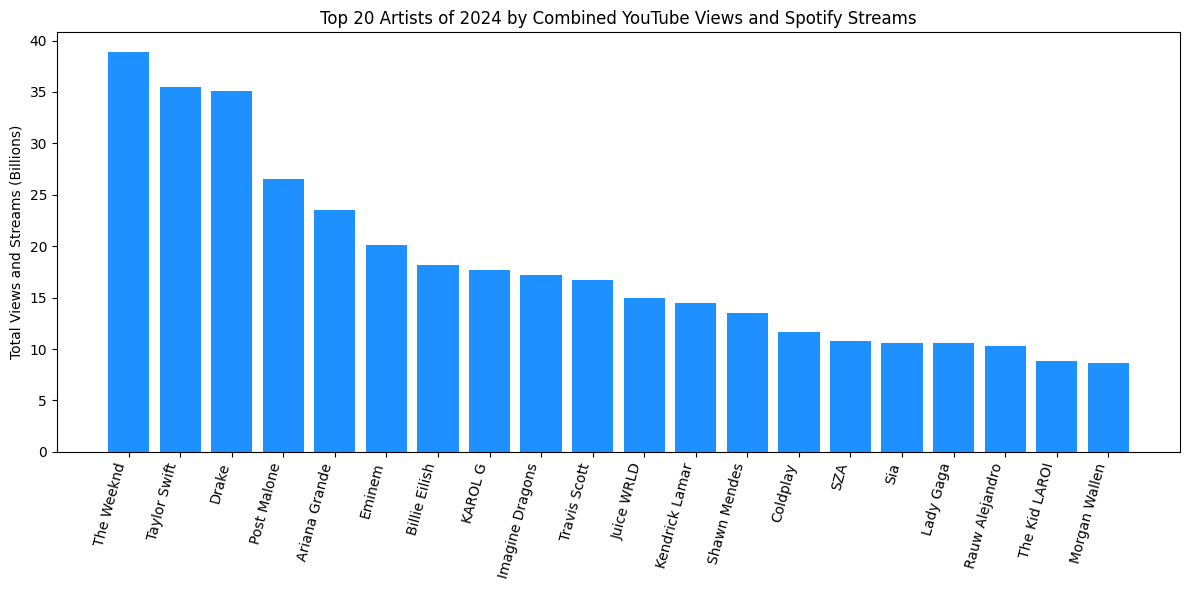

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

joined_files = os.path.join("./youtube-trending-videos-updated-daily/music", "music_2024*.csv")
joined_list = glob.glob(joined_files)
ydf = pd.concat(map(lambda f: pd.read_csv(f, encoding='Mac_Roman'), joined_list), ignore_index=True)

ydf_dropped = ydf.drop(columns=[
    'description', 'publishedText', 'videoUrl', 'channelId', 'channelUrl',
    'thumbnails', 'viewsText', 'durationText','verified', 'creatorOnRise', 'isShort'])
ydf_dropped['publishedDate'] = pd.to_datetime(ydf_dropped['publishedDate'])
ydf_clean = ydf_dropped.rename(columns={'title':'Title', 'publishedDate':'Release Date', 'channelName':'Channel Name', 
                                        'videoId':'Video ID', 'views':'YouTube Views', 'duration':'Duration'}).copy()
ydf_merged = ydf_clean.groupby('Video ID').agg({'Title':'first',
                                                'Release Date':'first',
                                                'Channel Name':'first',
                                                'YouTube Views':'max'}).reset_index()

sdf = pd.read_csv('./most-streamed-spotify-songs-2024/spotify-2024.csv', encoding = 'latin1')
sdf_dropped = sdf.drop(columns=[
    'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count','Spotify Playlist Reach', 
    'Spotify Popularity', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins','Deezer Playlist Count',
         'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity','Explicit Track'])
sdf_clean = sdf_dropped.dropna(subset=['Artist', 'Spotify Streams']).copy()
sdf_clean['Spotify Streams'] = sdf_clean['Spotify Streams'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Views'] = sdf_clean['YouTube Views'].str.replace(',', '').astype('Int64')
sdf_clean['YouTube Likes'] = sdf_clean['YouTube Likes'].str.replace(',', '').astype('Int64')
sdf_clean['Release Date'] = pd.to_datetime(sdf_clean['Release Date'])
for col in ['Spotify Streams', 'YouTube Views', 'YouTube Likes']:
    mean_val = sdf_clean[col].mean()
    sdf_clean[col] = sdf_clean[col].fillna(round(mean_val)).astype('Int64')

sdf_clean = sdf_clean.drop(columns=['Track', 'Album Name', 'Release Date', 'YouTube Views', 'YouTube Likes'])
sdf_merged_artists = sdf_clean.groupby('Artist').agg({
    'Spotify Streams': 'sum'}).reset_index()

def find_artist(title):
    for artist in sdf_merged_artists['Artist'].unique():
        if isinstance(title, str) and isinstance(artist, str) and title.startswith(artist):
            return artist
    return None

ydf_merged['Artist'] = ''
ydf_merged['Artist'] = ydf_merged['Title'].apply(find_artist) 
ydf_merged = ydf_merged.dropna(subset=['Artist'])
ydf_merged = ydf_merged.drop(columns=['Title', 'Release Date', 'Video ID', 'Channel Name'])
ydf_merged_artists = ydf_merged.groupby('Artist').agg({
    'YouTube Views': 'sum'}).reset_index()

joined_df = pd.merge(ydf_merged_artists, sdf_clean, on='Artist', how='inner')
joined_df = joined_df.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',})

joined_df['Total Views and Streams'] = joined_df['YouTube Views'] + joined_df['Spotify Streams']

top_total = joined_df.sort_values(by='Total Views and Streams', ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.bar(top_total.index, (top_total['Total Views and Streams'] / 1000000000), color='dodgerblue')
plt.xticks(rotation=75, ha='right')
plt.ylabel('Total Views and Streams (Billions)')
plt.title('Top 20 Artists of 2024 by Combined YouTube Views and Spotify Streams')
plt.tight_layout()
plt.show()